In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/one-year-of-fitbit-chargehr-data/One_Year_of_FitBitChargeHR_Data.csv


In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sb

In [3]:
d1 = pd.read_csv("/kaggle/input/one-year-of-fitbit-chargehr-data/One_Year_of_FitBitChargeHR_Data.csv")
d1.head()

,Date,Calories,Steps,Distance,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity
0,08-05-2015,1.934,905.000,"0,65",0,1.355,46,0,0,168.000
1,09-05-2015,3.631,18.925,"14,11",4,611.000,316,61,60,2.248
2,10-05-2015,3.204,14.228,"10,57",1,602.000,226,14,77,1.719
3,11-05-2015,2.673,6.756,"5,02",8,749.000,190,23,4,962.000
4,12-05-2015,2.495,5.020,"3,73",1,876.000,171,0,0,736.000


In [4]:
d1.tail()

,Date,Calories,Steps,Distance,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity
362,03-05-2016,3.796,18.588,"14,13",16,599.0,275,49,79,2.360
363,04-05-2016,3.525,16.382,"12,39",16,684.0,333,10,55,2.075
364,05-05-2016,3.649,21.913,"16,4",19,701.0,287,29,90,2.249
365,06-05-2016,3.539,19.023,"14,79",15,575.0,298,8,85,2.112
366,07-05-2016,3.040,9.526,"7,08",2,564.0,370,13,10,1.604


In [5]:
d1.describe()

,Calories,Steps,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,3.036858,13.991343,11.724796,563.934482,236.405995,26.163488,35.722071,82.681499
std,0.405912,46.866915,10.337370,294.793145,86.531376,20.319456,31.006682,236.867152
min,1.789000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000
25%,2.808500,8.339500,5.000000,520.000000,179.000000,8.000000,10.500000,1.342000
50%,3.040000,11.199000,11.000000,663.000000,226.000000,24.000000,29.000000,1.607000
75%,3.256500,14.227000,16.000000,756.500000,290.000000,41.500000,54.000000,1.975500
max,4.351000,905.000000,101.000000,998.000000,472.000000,101.000000,153.000000,983.000000


In [6]:
d1.drop(columns = 'floors',inplace=True)
d1.head(10)

,Date,Calories,Steps,Distance,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity
0,08-05-2015,1.934,905.000,"0,65",1.355,46,0,0,168.000
1,09-05-2015,3.631,18.925,"14,11",611.000,316,61,60,2.248
2,10-05-2015,3.204,14.228,"10,57",602.000,226,14,77,1.719
3,11-05-2015,2.673,6.756,"5,02",749.000,190,23,4,962.000
4,12-05-2015,2.495,5.020,"3,73",876.000,171,0,0,736.000
5,13-05-2015,2.760,7.790,"5,79",726.000,172,34,18,1.094
6,14-05-2015,2.687,5.614,"4,17",782.000,216,13,1,983.000
7,15-05-2015,2.793,8.169,"6,07",801.000,218,8,7,1.092
8,16-05-2015,4.061,19.971,"14,84",532.000,247,101,118,2.700
9,17-05-2015,3.349,8.520,"6,33",606.000,186,46,73,1.766


In [7]:
d1['total_activity'] = d1[['Minutes_of_slow_activity','Minutes_of_moderate_activity','Minutes_of_intense_activity']].sum(axis=1)
d1['total_activity']

0       46
1      437
2      317
3      217
4      171
      ... 
362    403
363    398
364    406
365    391
366    393
Name: total_activity, Length: 367, dtype: int64

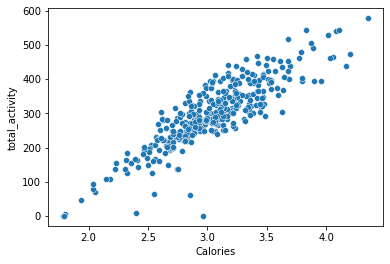

In [8]:
a1 = sb.scatterplot(x = 'Calories', y = 'total_activity', data=d1)

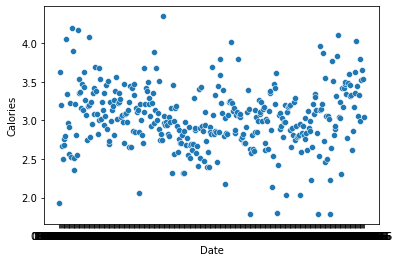

In [9]:
a2 = sb.scatterplot(x = 'Date', y = 'Calories', data=d1)

In [10]:
c1 = d1['Calories'].mean()
c1

3.0368583106267035

In [11]:
c2 = d1['Calories'].max()
c2

4.351

In [12]:
c3 = d1['Calories'].min()
c3

1.789

In [13]:
b1 = d1['total_activity'].mean()
b1

298.291553133515

In [14]:
b2 = d1['total_activity'].max()
b2

579

In [18]:
e1 = d1.groupby(['Calories', 'Date']).min()
e1

Steps Distance  Minutes_sitting  \
Calories Date                                            
1.789    23-12-2015    0.000        0            1.440   
1.790    13-03-2016    0.000        0            1.440   
         28-03-2016    0.000        0            1.440   
1.801    24-01-2016   39.000     0,03            1.076   
1.934    08-05-2015  905.000     0,65            1.355   
...                      ...      ...              ...   
4.083    13-06-2015   26.444    19,65          549.000   
4.112    06-04-2016   23.286    17,84          561.000   
4.170    30-05-2015   21.479    15,98          503.000   
4.197    23-05-2015   17.928    13,32          533.000   
4.351    09-09-2015   22.238    16,52          355.000   

                     Minutes_of_slow_activity  Minutes_of_moderate_activity  \
Calories Date                                                                 
1.789    23-12-2015                         0                             0   
1.790    13-03-2016                         0                             0   
         28-03-2016                         0                             0   
1.801    24-01-2016                         5                             0   
1.934    08-05-2015                        46                             0   
...                                       ...                           ...   
4.083    13-06-2015                       429                            56   
4.112    06-04-2016                       451                            28   
4.170    30-05-2015                       230                            55   
4.197    23-05-2015                       262                            79   
4.351    09-09-2015                       407                            87   

                     Minutes_of_intense_activity  Calories_Activity  \
Calories Date                                                         
1.789    23-12-2015                            0              0.000   
1.790    13-03-2016                            0              0.000   
         28-03-2016                            0              0.000   
1.801    24-01-2016                            0             16.000   
1.934    08-05-2015                            0            168.000   
...                                          ...                ...   
4.083    13-06-2015                           56              2.818   
4.112    06-04-2016                           67              2.850   
4.170    30-05-2015                          153              2.794   
4.197    23-05-2015                          132              2.880   
4.351    09-09-2015                           85              3.181   

                     total_activity  
Calories Date                        
1.789    23-12-2015               0  
1.790    13-03-2016               0  
         28-03-2016               0  
1.801    24-01-2016               5  
1.934    08-05-2015              46  
...                             ...  
4.083    13-06-2015             541  
4.112    06-04-2016             546  
4.170    30-05-2015             438  
4.197    23-05-2015             473  
4.351    09-09-2015             579  

[366 rows x 8 columns]

In [29]:
d1.max()

Date                            31-12-2015
Calories                             4.351
Steps                              905.000
Distance                              9,98
Minutes_sitting                    998.000
Minutes_of_slow_activity               472
Minutes_of_moderate_activity           101
Minutes_of_intense_activity            153
Calories_Activity                  983.000
total_activity                         579
dtype: object

In [30]:
d1.min()

Date                            01-01-2016
Calories                             1.789
Steps                                0.000
Distance                                 0
Minutes_sitting                      1.002
Minutes_of_slow_activity                 0
Minutes_of_moderate_activity             0
Minutes_of_intense_activity              0
Calories_Activity                    0.000
total_activity                           0
dtype: object

In [ ]:
d1.mean()